- Vasicek model
$$ dr_t=\alpha(b-r_t)dt+\sigma dW_t$$
- EM scheme
$$ r_{t+1}=r_t+a(b-r_t) \delta +\sigma ({r_t})W_{t,t+\delta}           $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def SDE(Mu,Sigma,r0,T0,T1,n):
    t=np.linspace(T0,T1,n+1)
    rh=r0+np.zeros(n+1)
    for i in range(n):
        rh[i+1]=rh[i]+Mu(rh[i],t[i])*(t[i+1]-t[i])+Sigma(rh[i],t[i])*np.sqrt(t[i+1]-t[i])*np.random.normal()  
    return rh,t

In [2]:
alpha=2.11
b=0.02
sig=0.2
Mu = lambda r,t: alpha*(b-r)
Sigma=lambda r,t: sig

In [3]:
T0=0
T1=10
n=1000      #number of time step
#W=np.zeros(n+1)
t=np.linspace(T0,T1,n+1)

r0=0.005
r=r0+np.zeros(n+1)
iteration=1000     # number of iteration time
#K=110.
p=np.zeros(iteration)

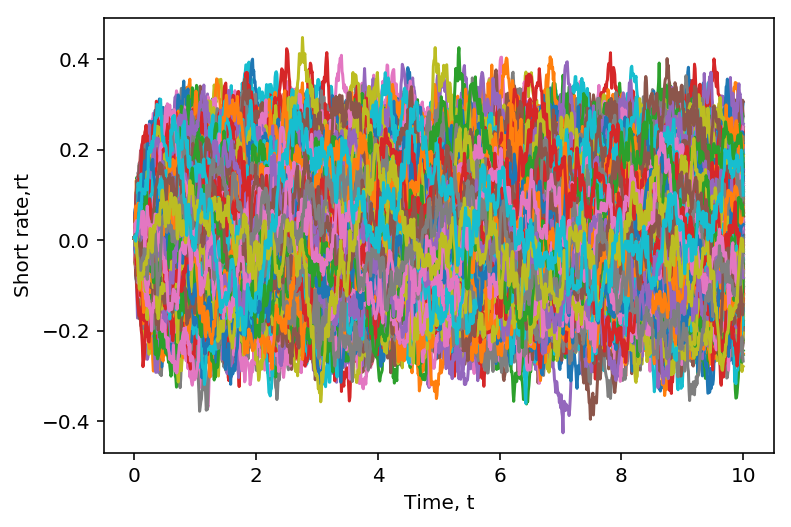

In [4]:
for i in range(iteration):
    [rh,t]=SDE(Mu,Sigma,r0,T0,T1,n)
    plt.plot(t,rh)
    #plt.ylim(0,200)
    plt.ylabel("Short rate,rt")
    plt.xlabel("Time, t")
    #p[i]=PutPay(r,T1-T0,K,xh[-1])
    p[i]=rh[-1]
    #sum=sum+xh[-1]

In [0]:
print('The mean short rate is ', p.mean())


- Question5.2

Derivation of the explicit form
$$ dr_t=a(b-r_t)dt+\sigma dW_t $$
Based on Ito's fornmula, the following solution can be obtained:

$$r_t=e^{-at}[r_0+\int_0^tabe^{au}du+\sigma \int_0^te^{au}dW_u] = \mu_t +\sigma \int_0^t e^{a(u-t)}dW_u   $$
The integration of the vasicek model is as follows:

$$ r_t= r_0+\int_0^t(a(b-r_u)du+\sigma dW_u)             $$
Comparing the above two equations, the following equation can be obtained:

$$   \mu_t=\mathbb E[r_t]=r_0+\int_0^ta(b-\mathbb E[r_u])du      $$
Solving the above linear ordinary differential equation (ODE), the expection of short rate is obtained as follows:

$$ \mathbb E[r_t]=e^{-at}[r_0+b(e^{at}-1)]      $$
If the stochastic term is included, the explicit solution is as follows:

$$ r_t=e^{-at}[r_0+b(e^{at}-1)] + \sigma \int_0^t dW_t    $$
Thus, $$ lim_{t \rightarrow \infty} \mathbb E[r_t] = b $$